In [80]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [82]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [83]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hamalainen, Mrs. William (Anna)",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [84]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [85]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


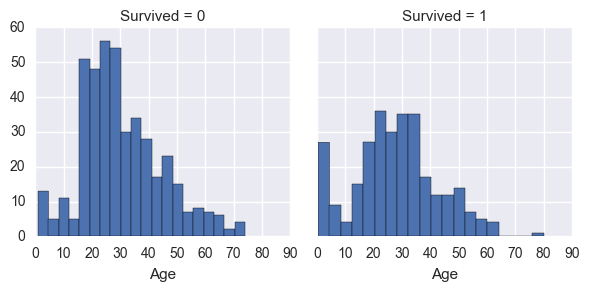

In [86]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

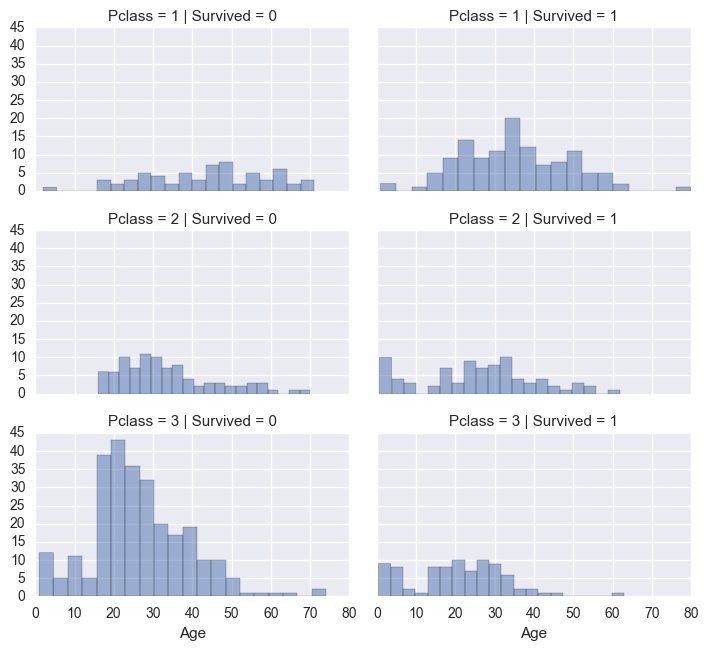

In [87]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

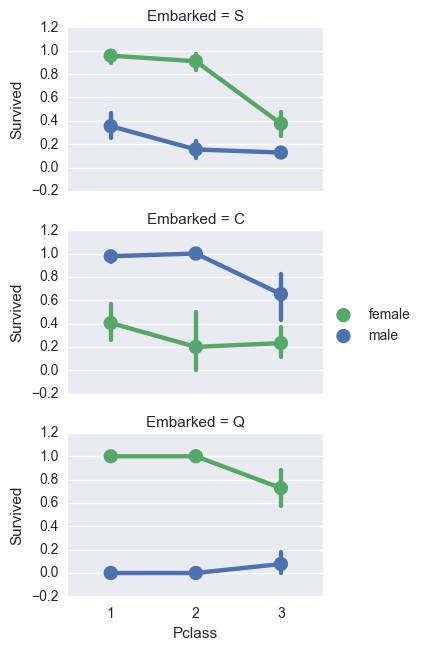

In [88]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [89]:
train_df = pd.get_dummies(train_df, columns=["Pclass"])
test_df = pd.get_dummies(test_df, columns=["Pclass"])

In [90]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
test_df = pd.get_dummies(test_df, columns=["Embarked"])

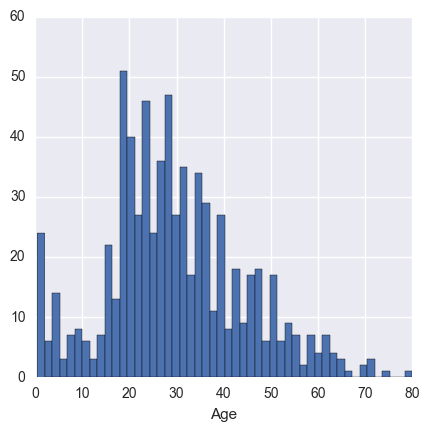

In [91]:
g = sns.FacetGrid(train_df, size=4.4,)
g.map(plt.hist, 'Age', bins=50)

In [92]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80]",0.090909


In [93]:
def create_age_groups(dataset):
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [94]:
create_age_groups(train_df)
create_age_groups(test_df)

In [95]:
train_df = train_df.drop("AgeBand", axis=1)

In [97]:
train_df['Payment'] = pd.cut(train_df['Fare'], 4)
train_df[['Payment', 'Survived']].groupby(['Payment'], as_index=False).mean().sort_values(by='Payment', ascending=True)

,Payment,Survived
0,"(-0.512, 128.0823]",0.368113
1,"(128.0823, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [98]:
def create_payment_groups(dataset):
    dataset.loc[ dataset['Fare'] <= 128, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 128) & (dataset['Fare'] <= 256), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 256) & (dataset['Fare'] <= 384), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 384, 'Fare'] = 3

In [99]:
create_payment_groups(train_df)
create_payment_groups(test_df)

In [100]:
train_df = train_df.drop(["Age", "Fare"], axis=1)
test_df = test_df.drop(["Age", "Fare"], axis=1)

In [103]:
def convert_gender(dataset):
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [104]:
convert_gender(train_df)
convert_gender(test_df)

In [107]:
train_df = train_df.drop(["Ticket", "Cabin", "PassengerId"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin", "PassengerId"], axis=1)

In [110]:
train_df = train_df.drop("Payment", axis=1)

In [111]:
def is_alone(dataset):
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset = dataset.drop(["FamilySize",'SibSp', 'Parch'], axis=1)

In [112]:
is_alone(train_df)
is_alone(test_df)

In [114]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [117]:
def rank(dataset):
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [118]:
rank(train_df)
rank(test_df)

In [126]:
train_df.head()

,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,IsAlone,Title_1,Title_2,Title_3,Title_4,Title_5
0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,0,1,1,0,1,0,0,0
3,1,1,1,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,1,1,0,0,0,0


In [120]:
train_df = train_df.drop(["SibSp", "Parch", "Name"], axis=1)
test_df = test_df.drop(["SibSp", "Parch", "Name"], axis=1)

In [123]:
train_df = train_df.drop("FamilySize", axis=1)
test_df = test_df.drop("FamilySize", axis=1)

In [125]:
train_df = pd.get_dummies(train_df, columns=["Title"])
test_df = pd.get_dummies(test_df, columns=["Title"])

In [128]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()

In [138]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

83.280000000000001